<a href="https://colab.research.google.com/github/ImSumitJadhav/Pandas-Exercise/blob/main/Exercises_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv",delimiter=",")

In [3]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple["Date"]=pd.to_datetime(apple["Date"])

In [6]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [8]:
apple.set_index("Date").head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93
2014-06-27,90.82,92.00,90.77,91.98,64006800,91.98
2014-06-26,90.37,91.05,89.80,90.90,32595800,90.90
2014-06-25,90.21,90.70,89.65,90.36,36852200,90.36


### Step 7.  Is there any duplicate dates?

In [10]:
apple.duplicated("Date").value_counts()

False    8465
dtype: int64

In [13]:
apple.Date.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [18]:
apple.sort_values("Date").head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8459,1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
8458,1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
8457,1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
8456,1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51
8455,1980-12-26,35.50,35.62,35.50,35.50,13893600,0.55


### Step 9. Get the last business day of each month

In [28]:
apple["year"]=pd.DatetimeIndex(apple.Date).year
apple["month"]=pd.DatetimeIndex(apple.Date).month
apple["day_no"]=pd.DatetimeIndex(apple.Date).day

In [24]:
apple.groupby("month")["day_no"].max()

month
1     31
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: day_no, dtype: int64

### Step 10.  What is the difference in days between the first day and the oldest

In [27]:
(apple.Date.max()-apple.Date.min()).days

12261

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

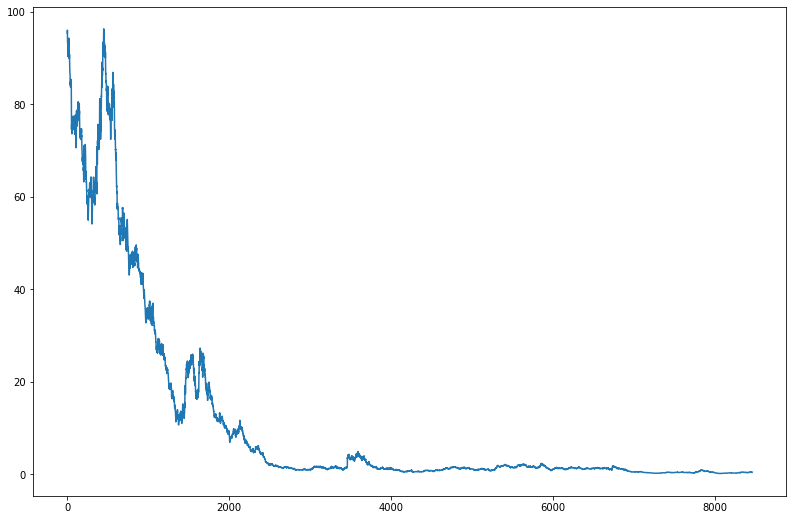

In [38]:
plt.figure(figsize=(13.5,9))
apple["Adj Close"].plot()

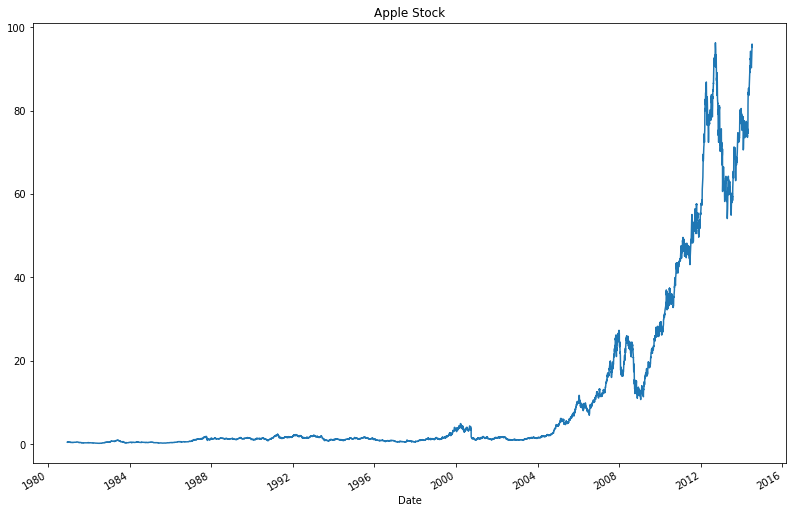

In [44]:
# makes the plot and assign it to a variable
appl_open=apple.set_index("Date")

plt.figure(figsize=(13.5,9))
appl_open['Adj Close'].plot(title = "Apple Stock")